# Making a CMD for your Star Cluster

This notebook introduces a few commands that you'll need to make the Color Magnitude Diagram for your star cluster. You can also use the cells below to write code for your unit project.

## .loc[ ] indexing

## Finding absolute magnitude

You will need to convert "G" to absolute magnitude for your CMD.

Look in the dataset for distance. Using G and distance, you can calculate absolute magnitude using the following equation:

absolute magnitude = G - 5 * log(distance) + 5

In [2]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.colors as mpl

In [3]:
df = pd.read_csv("data table.csv")
print(df.head())

   row_id     tgas_source_id             name         ra        dec  parallax  \
0     659  49809491645958528   TYC 1253-388-1  59.457281  18.562195    7.7395   
1    1559  66939848447027584  TYC 1804-1924-1  57.070387  25.214932    7.6087   
2    1904  50905051903831680        HIP 18091  58.003444  19.596690    6.7611   
3    1929  51452746133437696        HIP 18544  59.507154  20.676596    7.6989   
4    1944  51619115986889472  TYC 1261-1630-1  58.370320  20.907178    7.4847   

   distance       G       J           rave_obs_id    rv  erv  group_id  \
0   129.949  11.160   9.984                   NaN   NaN  NaN         0   
1   132.557   9.066   8.137  20120109_0346p23_140  2.95  1.6         0   
2   148.752  10.265   9.267                   NaN   NaN  NaN         0   
3   131.839   9.249   8.436                   NaN   NaN  NaN         0   
4   134.194  11.553  10.096                   NaN   NaN  NaN         0   

   group_size  
0         151  
1         151  
2         151  
3   

In [4]:
ap_distance = df["distance"].loc[df["group_id"]==1]
ap_j = df["J"].loc[df["group_id"]==1]
ap_g = df["G"].loc[df["group_id"]==1]
ap_color = ap_g - ap_j

In [5]:
# You can use this function in your code to find the log of distance:
# np.log10()

ap_log_distance = np.log10(ap_distance)
ap_abm = ap_g - (5*ap_log_distance) + 5
print(ap_abm.head())

151    4.317935
152    1.636046
153    1.871381
154    2.989399
155    4.106913
dtype: float64


### Your first task is to create a Color Magnitude Diagram for your star cluster
You can use as many of the cells below as you need. You can add new cells with the "+" button.

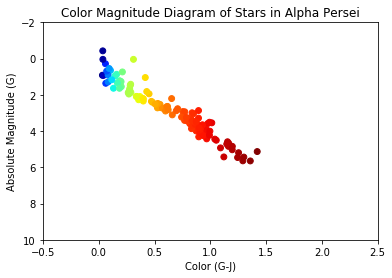

In [6]:
cm = plt.cm.get_cmap("jet")
plt.scatter(ap_color, ap_abm, c=ap_color, s=35, cmap=cm, norm=mpl.LogNorm())
plt.xlim(-0.5, 2.5)
plt.ylim(-2, 10)
plt.xlabel("Color (G-J)")
plt.ylabel("Absolute Magnitude (G)")
plt.title("Color Magnitude Diagram of Stars in Alpha Persei")
plt.gca().invert_yaxis()
plt.savefig("color magnitude diagram.png")
plt.show()

### Coding Challenge 1: Add the sun to your color magnitude diagram

In [7]:
sunJ = 3.64
sunG = 5.12
sunColor = sunG - sunJ

#Use SunG as absolute magnitude

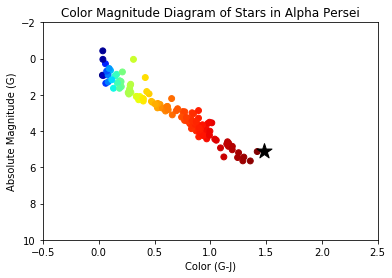

In [16]:
cm = plt.cm.get_cmap("jet")
plt.scatter(ap_color, ap_abm, c=ap_color, s=35, cmap=cm, norm=mpl.LogNorm())
plt.scatter(sunColor, sunG, c= 'black', s= 250, marker="*")
plt.xlim(-0.5, 2.5)
plt.ylim(-2, 10)
plt.xlabel("Color (G-J)")
plt.ylabel("Absolute Magnitude (G)")
plt.title("Color Magnitude Diagram of Stars in Alpha Persei")
plt.gca().invert_yaxis()
plt.savefig("color magnitude diagram with sun.png")
plt.show()

### Coding Challenge 2: Add a colormap to your diagram

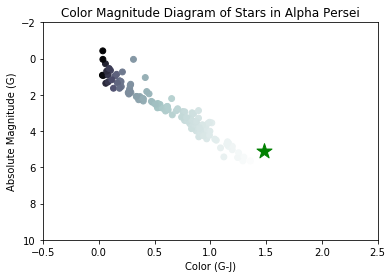

In [9]:
cm = plt.cm.get_cmap("bone")
plt.scatter(ap_color, ap_abm, c=ap_color, s=35, cmap=cm, norm=mpl.LogNorm())
plt.scatter(sunColor, sunG, c= 'green', s= 250, marker="*")
plt.xlim(-0.5, 2.5)
plt.ylim(-2, 10)
plt.xlabel("Color (G-J)")
plt.ylabel("Absolute Magnitude (G)")
plt.title("Color Magnitude Diagram of Stars in Alpha Persei")
plt.gca().invert_yaxis()
plt.savefig("color magnitude diagram with star and aesthetically pleasing colormap.png")
plt.show()

### Coding Challenge 3: Create histograms for the absolute magnitude and color of your star cluster

In [27]:
len_abm = len(ap_abm)
len_color = len(ap_color)
print(len_abm)
print(len_color)

125
125


In [33]:
print(len_abm**(1/2))
print(len_color**(1/2))

11.180339887498949
11.180339887498949


In [11]:
print(ap_color.max())
print(ap_color.min())

1.42
-0.092


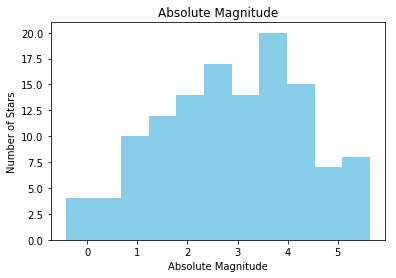

In [42]:
plt.hist(ap_abm, bins = 11, color = 'skyblue')
plt.title("Absolute Magnitude")
plt.xlabel("Absolute Magnitude")
plt.ylabel("Number of Stars")
plt.show()

/Users/student/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/student/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


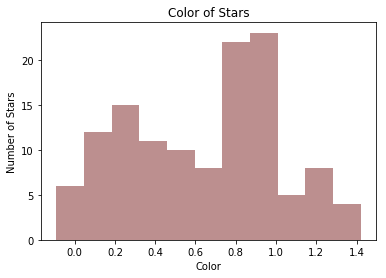

In [43]:
plt.hist(ap_color, bins = 11, range=(ap_color.min(), ap_color.max()), color ='rosybrown')
plt.title("Color of Stars")
plt.ylabel("Number of Stars")
plt.xlabel("Color")
plt.show()